A continuación se presenta la forma de usar una máscara tipo promedio con la imagen.

Implementar una función que realice el filtrado promedio usando la máscara que se indica a continuación.

Debe leer una imagen , convertirla a gris y aplicar la convolución usando la función que implementó en el ejercicio 3 con la máscara de promedio.

Usando la función filter2 realice el filtrado promedio y compare el resultado de la función con el resultado de usar tu propia función de convolución

Usando la función conv2 realice el filtrado promedio y compare el resultado de la función con el resultado de usar tu propia función de convolución y de usar filter2

Máscara 3x3

       for i=2:f-1
       
           for j=2:c-1
           
                D(i,j)=sum(sum(A((i-1):(i+1),(j-1):(j+1))));
                
                D(i,j)=D(i,j)/9;
                
end end

1.- Implementación del filtro promedio de la biblioteca cv2.


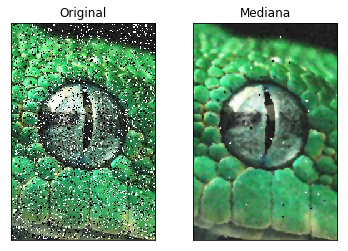

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Imagenes_Pruebas/sal_pimienta.jpg')

kernel = np.ones((5,5),np.float32)/25

median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Mediana')
plt.xticks([]), plt.yticks([])
plt.show()


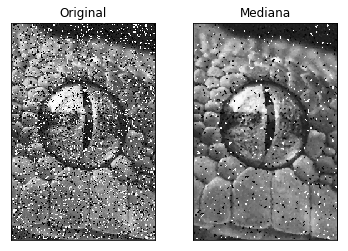

In [27]:
%matplotlib inline
import numpy
from PIL import Image


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size 
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("Imagenes_Pruebas/sal_pimienta.jpg").convert("L")
    arr = numpy.array(img)
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    removed_noise = median_filter(arr, 3) 
    img = Image.fromarray(removed_noise)
    plt.subplot(122),plt.imshow( img),plt.title('Mediana')
    plt.xticks([]), plt.yticks([])
    plt.show()


main()